In [3]:
from IPython.display import Image
import pandas as pd
import numpy as np
import pgmpy
from pgmpy.estimators import BayesianEstimator,BdeuScore, K2Score, BicScore, HillClimbSearch
from pgmpy.models import BayesianModel
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pylab as pl

### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

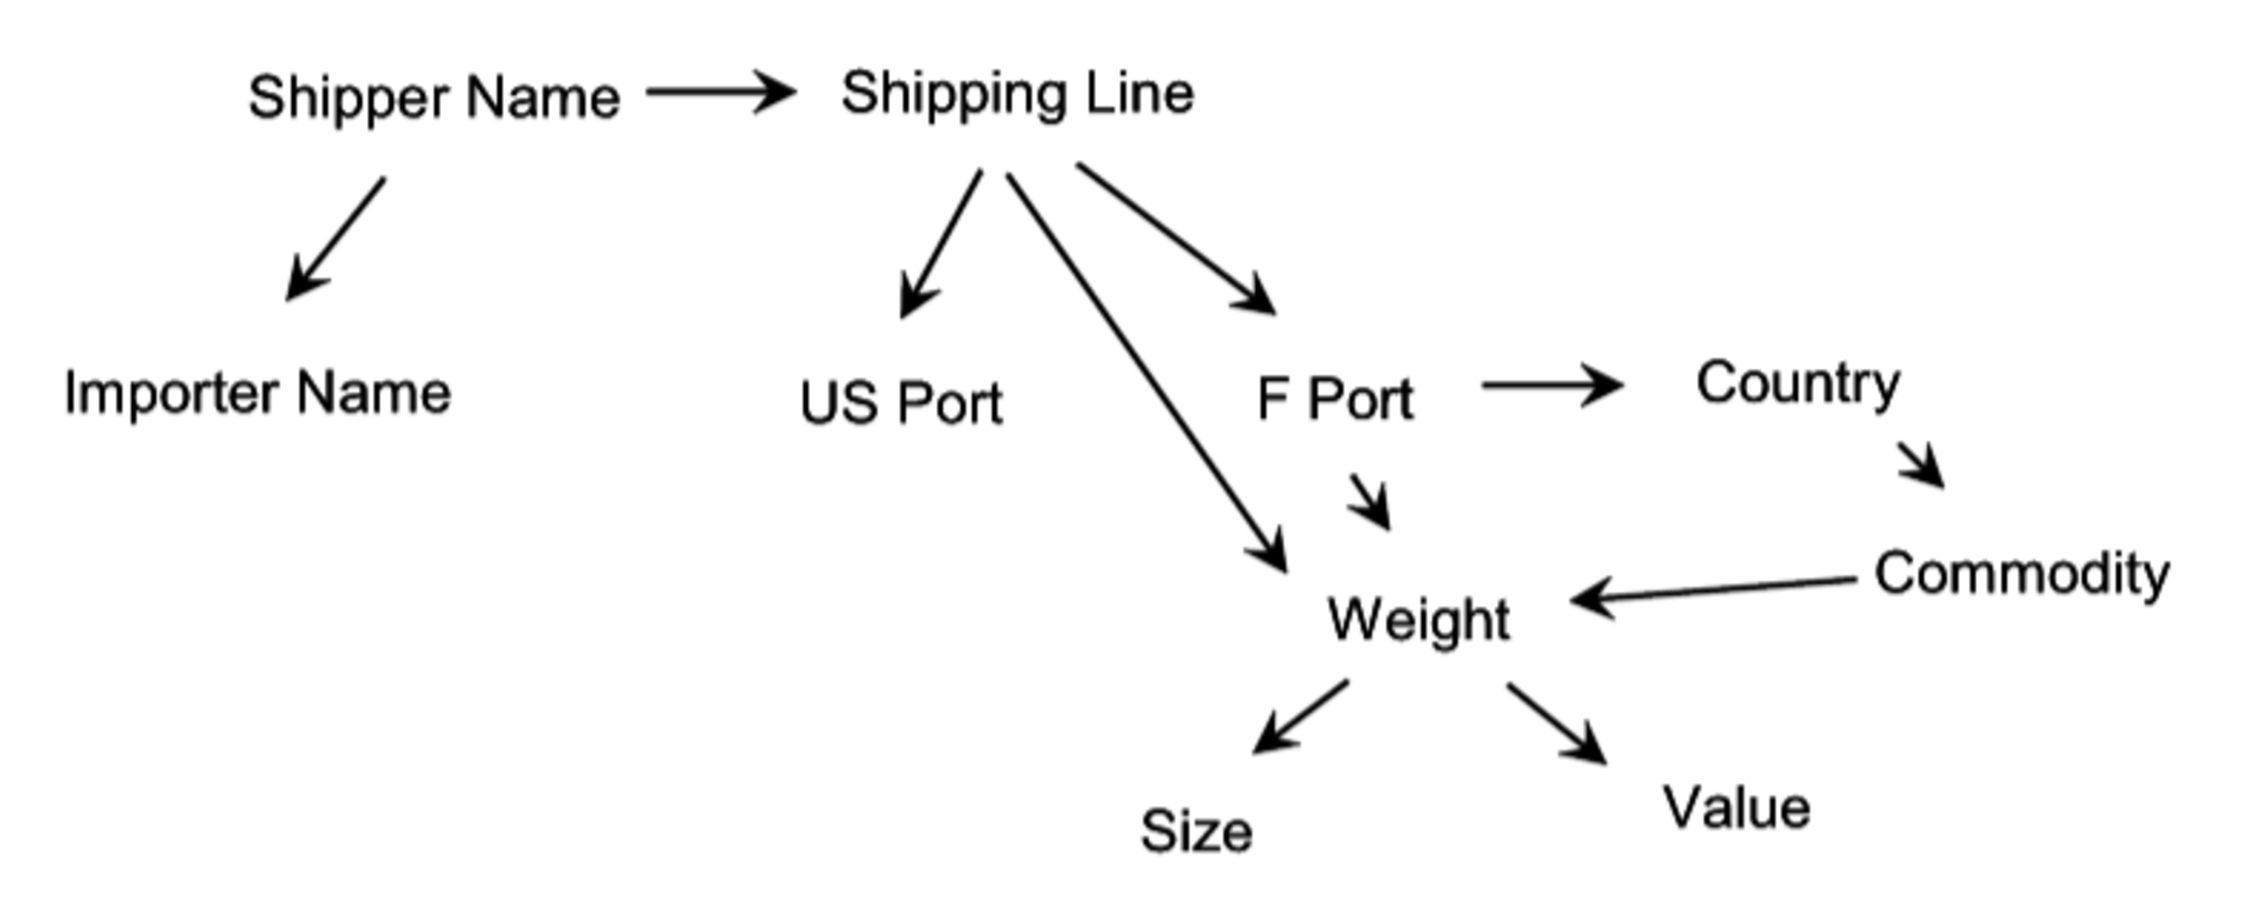

In [4]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?

CI (Shipper Name, Value | Shipping Line)? 

CI (Foreign Port, Commodity | Country)? 

CI (Foreign Port, Commodity | County, Weight)? 

* dependent;
 independent;
 independent;
 dependent.

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

(Your answers here, including all calculations)

a) p(Heavy, Vancouver, Seattle | ASCO) = 0.2(1.0)(1.0)(0.3) = 6%

b) p(Heavy, Vancouver, Seattle | CSCO) = 0.15(0.6)(0.7)(0.8) = 5.04%

c) p(Heavy, Yokohama, LA | CSCO) = 0.6(0.4)(0.2)(0.7) = 3.36%

my anwser is c.


### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [103]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,2,0,0,1,0,1
2,3,1,0,1,1,1
3,2,0,0,1,1,1
4,1,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [104]:
#a)
#HillClimb
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model=hc.estimate()
print (best_model.edges())

[('B', 'A'), ('D', 'A'), ('F', 'A')]


In [106]:
#b)
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print ("CPD of {variable}:".format(variable = cpd.variable))
    print(cpd)

CPD of A:
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| B    | B(0)             | B(0)             | B(0)             | B(0)             | B(1)            | B(1)             | B(1)             | B(1)             |
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| D    | D(0)             | D(0)             | D(1)             | D(1)             | D(0)            | D(0)             | D(1)             | D(1)             |
+------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
| F    | F(0)             | F(1)             | F(0)             | F(1)             | F(0)            | F(1)             | F(0)             | F(1)             |
+------+------------------+---

In [107]:
#c)
predicted_test = best_model.predict(test.loc[:,"B":"F"])
print "Out of sample accuracy:", (test.loc[:,"A"] == predicted_test['A']).mean()

Out of sample accuracy: 0.5065


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster. (5 pts)

In [406]:
df = pd.read_csv('HW3Q3_1.csv')
df.head()
df_hrs = df.iloc[:,9:33]
df_hrs.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


In [407]:
test=preprocessing.normalize(df_hrs)
test.shape

(119, 24)

In [408]:
km = KMeans(n_clusters=3) #should I use random state??km = KMeans(random_state=234,n_clusters=3)
km.fit(test)
res=km.predict(test)
res=pd.concat((pd.Series(df.crime_type),pd.Series(res)),axis=1)

In [409]:
res.columns = ['crime_type','cluster']
res.head()

,crime_type,cluster
0,ARSON: BY FIRE,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,2
2,ASSAULT: AGGRAVATED: HANDGUN,2
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,0
4,ASSAULT: AGGRAVATED: OTHER FIREARM,2


In [410]:
df_fbi = df.iloc[:,0:2]
df_fbi.head()

,crime_type,Category
0,ARSON: BY FIRE,P1P
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2
2,ASSAULT: AGGRAVATED: HANDGUN,P1V
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V


In [411]:
#combine with FBI category
df_hrs_fbi = res.merge(df_fbi, left_on='crime_type',right_on='crime_type')

In [412]:
df_c1 = res[res.cluster == 0]
df_c2 = res[res.cluster == 1]
df_c3 = res[res.cluster == 2]

In [413]:
df_c1.reset_index(inplace = True)
df_c2.reset_index(inplace = True)
df_c3.reset_index(inplace = True)

In [414]:
df_hrs.reset_index(inplace=True)

In [415]:
c1 = df_c1.merge(df_hrs, left_on='index', right_on='index')
c2 = df_c2.merge(df_hrs, left_on='index', right_on='index')
c3 = df_c3.merge(df_hrs, left_on='index', right_on='index')

In [416]:
a = []
for i in range(24):
    a.append(c1['hour_'+str(i)].mean())

In [417]:
b = []
for i in range(24):
    b.append(c2['hour_'+str(i)].mean())

In [418]:
c = []
for i in range(24):
    c.append(c3['hour_'+str(i)].mean())

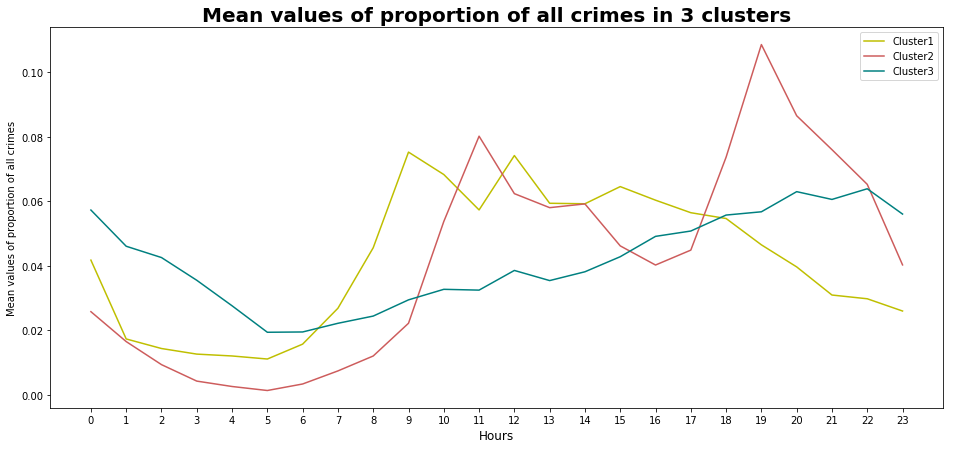

In [419]:
#create a line graph to visualize these values by cluster. 
fig = pl.figure(figsize = (16,7))
X=range(24)
pl.plot(X,a,c='y',label = 'Cluster1')
pl.plot(X,b,c='Indianred',label = 'Cluster2')
pl.plot(X,c,c='teal',label = 'Cluster3')
pl.legend()
pl.xticks(X)
pl.ylabel('Mean values of proportion of all crimes')
pl.xlabel('Hours',fontsize = 12)
pl.title('Mean values of proportion of all crimes in 3 clusters', weight='bold',size = '20')
pl.show()

#### Fig1. Mean values of proportion of all crimes in 3 clusters(hour-of-day)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

In the cluster 1, the peaks appear in the morning and noon time, and the mean values incearse largely during 7am to 9am then decrease from afternoon time.

In the cluster 2, the trend has two peaks, one in 11 am, one in around 7pm, which indicates that those types of cirme happen more frequently in the noon and evening;

In the cluster 3, the line is more flat than other two, and those types of crime happen more than other types in cluster1 and 3 during night time(18:00 - 6:00);

In general, late night time has lowest proportion of crimes in all 3 clusters.

c) Do you notice any consistent trends about which crime types are assigned to which cluster? Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)

In [433]:
c1.crime_type.values

array(['ASSAULT: AGGRAVATED: OTHER DANG WEAPON',
       'ASSAULT: PRO EMP HANDS NO/MIN INJURY', 'ASSAULT: SIMPLE',
       'BATTERY: AGG: HANDS/FIST/FEET NO/MINOR INJURY',
       'BATTERY: AGGRAVATED OF A SENIOR CITIZEN',
       'BATTERY: PRO EMP HANDS NO/MIN INJURY',
       'BURGLARY: ATTEMPT FORCIBLE ENTRY', 'BURGLARY: FORCIBLE ENTRY',
       'BURGLARY: UNLAWFUL ENTRY', 'CRIMINAL TRESPASS: TO LAND',
       'CRIMINAL TRESPASS: TO RESIDENCE',
       'CRIMINAL TRESPASS: TO STATE SUP LAND',
       'DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTITY THEFT',
       'DECEPTIVE PRACTICE: BOGUS CHECK',
       'DECEPTIVE PRACTICE: COUNTERFEIT CHECK',
       'DECEPTIVE PRACTICE: CREDIT CARD FRAUD',
       'DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT $300 AND UNDER',
       'DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT OVER $ 300',
       'DECEPTIVE PRACTICE: FORGERY',
       'DECEPTIVE PRACTICE: FRAUD OR CONFIDENCE GAME',
       'DECEPTIVE PRACTICE: ILLEGAL USE CASH CARD',
       'NARCOTICS: FOUN

In [434]:
c2.crime_type.values

array(['DECEPTIVE PRACTICE: COUNTERFEITING DOCUMENT',
       'GAMBLING: GAME/DICE',
       'INTERFERENCE WITH PUBLIC OFFICER: OBSTRUCTING IDENTIFICATION',
       'NARCOTICS: MANU/DEL:CANNABIS 10GM OR LESS',
       'NARCOTICS: MANU/DEL:CANNABIS OVER 10 GMS',
       'NARCOTICS: MANU/DELIVER: HEROIN (WHITE)',
       'NARCOTICS: MANU/DELIVER:CRACK',
       'NARCOTICS: POSS: CANNABIS 30GMS OR LESS',
       'NARCOTICS: POSS: CANNABIS MORE THAN 30GMS',
       'NARCOTICS: POSS: CRACK', 'NARCOTICS: POSS: HEROIN(WHITE)',
       'NARCOTICS: POSS: PCP', 'NARCOTICS: POSS: SYNTHETIC DRUGS',
       'NARCOTICS: POSSESSION OF DRUG EQUIPMENT',
       'NARCOTICS: SOLICIT NARCOTICS ON PUBLICWAY',
       'OTHER OFFENSE: GUN OFFENDER: ANNUAL REGISTRATION',
       'OTHER OFFENSE: GUN OFFENDER: DUTY TO REGISTER',
       'OTHER OFFENSE: LICENSE VIOLATION',
       'OTHER OFFENSE: PAROLE VIOLATION',
       'OTHER OFFENSE: VEHICLE TITLE/REG OFFENSE',
       'PUBLIC PEACE VIOLATION: RECKLESS CONDUCT',
       'WEAP

In [435]:
c3.crime_type.values

array(['ARSON: BY FIRE', 'ASSAULT: AGG PO HANDS NO/MIN INJURY',
       'ASSAULT: AGGRAVATED: HANDGUN',
       'ASSAULT: AGGRAVATED: OTHER FIREARM',
       'ASSAULT: AGGRAVATED:KNIFE/CUTTING INSTR',
       'BATTERY: AGG PO HANDS NO/MIN INJURY',
       'BATTERY: AGG: HANDS/FIST/FEET SERIOUS INJURY',
       'BATTERY: AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY',
       'BATTERY: AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST',
       'BATTERY: AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON',
       'BATTERY: AGGRAVATED: HANDGUN',
       'BATTERY: AGGRAVATED: OTHER DANG WEAPON',
       'BATTERY: AGGRAVATED:KNIFE/CUTTING INSTR',
       'BATTERY: DOMESTIC BATTERY SIMPLE', 'BATTERY: SIMPLE',
       'BURGLARY: HOME INVASION', 'CRIM SEXUAL ASSAULT: AGGRAVATED: OTHER',
       'CRIM SEXUAL ASSAULT: NON-AGGRAVATED',
       'CRIMINAL DAMAGE: CRIMINAL DEFACEMENT',
       'CRIMINAL DAMAGE: TO CITY OF CHICAGO PROPERTY',
       'CRIMINAL DAMAGE: TO PROPERTY',
       'CRIMINAL DAMAGE: T

* In cluster1, DECEPTIVE PRACTICE counts a relatively larger part, in cluster2, NARCOTICS counts a larger proportion, in cluster3, there's no specific crime type most assign to it.

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)


In [17]:
df_week = df.iloc[:,2:9]
test=preprocessing.normalize(df_week)
test.shape

(119, 7)

In [18]:
km = KMeans(n_clusters=3) #should I use random state??km = KMeans(random_state=234,n_clusters=3)
km.fit(test)
res=km.predict(test)
res=pd.concat((pd.Series(df.crime_type),pd.Series(res)),axis=1)

In [19]:
res.columns = ['crime_type','cluster']
res.head()

,crime_type,cluster
0,ARSON: BY FIRE,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,2
2,ASSAULT: AGGRAVATED: HANDGUN,2
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,1
4,ASSAULT: AGGRAVATED: OTHER FIREARM,2


In [20]:
dfw_c1 = res[res.cluster == 0]
dfw_c2 = res[res.cluster == 1]
dfw_c3 = res[res.cluster == 2]

In [21]:
dfw_c1.reset_index(inplace=True)
dfw_c2.reset_index(inplace=True)
dfw_c3.reset_index(inplace=True)

In [22]:
df_week.reset_index(inplace=True)

In [23]:
wc1 = dfw_c1.merge(df_week, left_on='index', right_on='index')
wc2 = dfw_c2.merge(df_week, left_on='index', right_on='index')
wc3 = dfw_c3.merge(df_week, left_on='index', right_on='index')

In [24]:
a = []
d = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in d:
    a.append(wc1['day_'+i].mean())

In [25]:
b = []
d = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in d:
    b.append(wc2['day_'+i].mean())

In [26]:
c = []
d = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in d:
    c.append(wc3['day_'+i].mean())

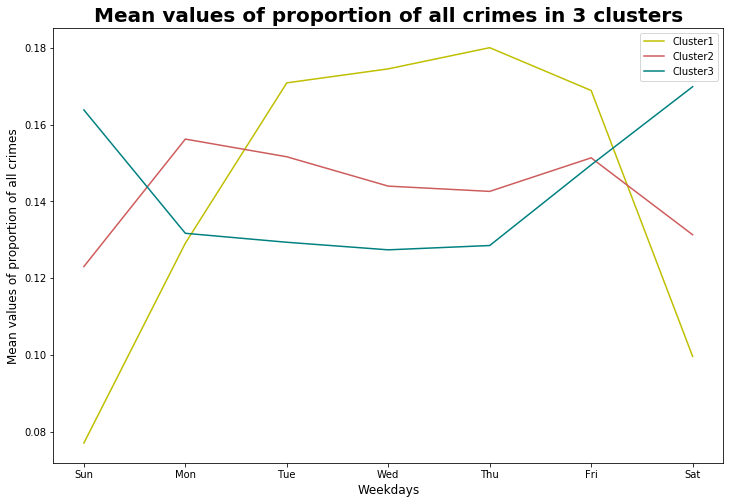

In [27]:
#create a line graph to visualize these values by cluster. 
fig = pl.figure(figsize = (12,8))
X=np.arange(7)
pl.plot(X,a,c='y',label = 'Cluster1')
pl.plot(X,b,c='Indianred',label = 'Cluster2')
pl.plot(X,c,c='teal',label = 'Cluster3')
pl.legend()
pl.xticks(X,d)
pl.ylabel('Mean values of proportion of all crimes',fontsize = 12)
pl.xlabel('Weekdays',fontsize = 12)
pl.title('Mean values of proportion of all crimes in 3 clusters', weight='bold',size = '20')
pl.show()

#### Fig2. Mean values of proportion of all crimes in 3 clusters(day-of-week)

* Discussion:
Based on this plot, we can easily tell that cluster3 has an opposite trend of cluster1 and cluster2, the types of crime in cluster3 happen more in the weekend, the types of crime in cluster2 has a relatively flat trend during a week, with a little proportion decrease in the weekend. The cluster 1 has high mean values of proprtion during the weekdays and low mean values of proportion in the weekend, which indicates that the types of crime in cluster 1 tend to happen more frequently during weekdays. 

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

In [37]:
df_com = df.iloc[:,33:110]
df_com.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [38]:
test=preprocessing.normalize(df_com)
test.shape

(119, 77)

In [39]:
km = KMeans(n_clusters=3)
km.fit(test)
res=km.predict(test)
res=pd.concat((pd.Series(df.crime_type),pd.Series(res)),axis=1)

In [40]:
res.columns = ['crime_type','cluster']
res.head()

,crime_type,cluster
0,ARSON: BY FIRE,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,2
2,ASSAULT: AGGRAVATED: HANDGUN,2
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,2
4,ASSAULT: AGGRAVATED: OTHER FIREARM,2


In [41]:
dfc_c1 = res[res.cluster == 0]
dfc_c2 = res[res.cluster == 1]
dfc_c3 = res[res.cluster == 2]

In [42]:
dfc_c1.reset_index(inplace=True)
dfc_c2.reset_index(inplace=True)
dfc_c3.reset_index(inplace=True)

In [47]:
df_com.reset_index(inplace=True)

In [48]:
cc1 = dfc_c1.merge(df_com, left_on='index', right_on='index')
cc2 = dfc_c2.merge(df_com, left_on='index', right_on='index')
cc3 = dfc_c3.merge(df_com, left_on='index', right_on='index')

In [68]:
a = []
for i in cc1.iloc[:,3:80].columns:
    a.append(cc1[i].mean())

In [69]:
b = []
for i in cc2.iloc[:,3:80].columns:
    b.append(cc2[i].mean())

In [70]:
c = []
for i in cc3.iloc[:,3:80].columns:
    c.append(cc3[i].mean())

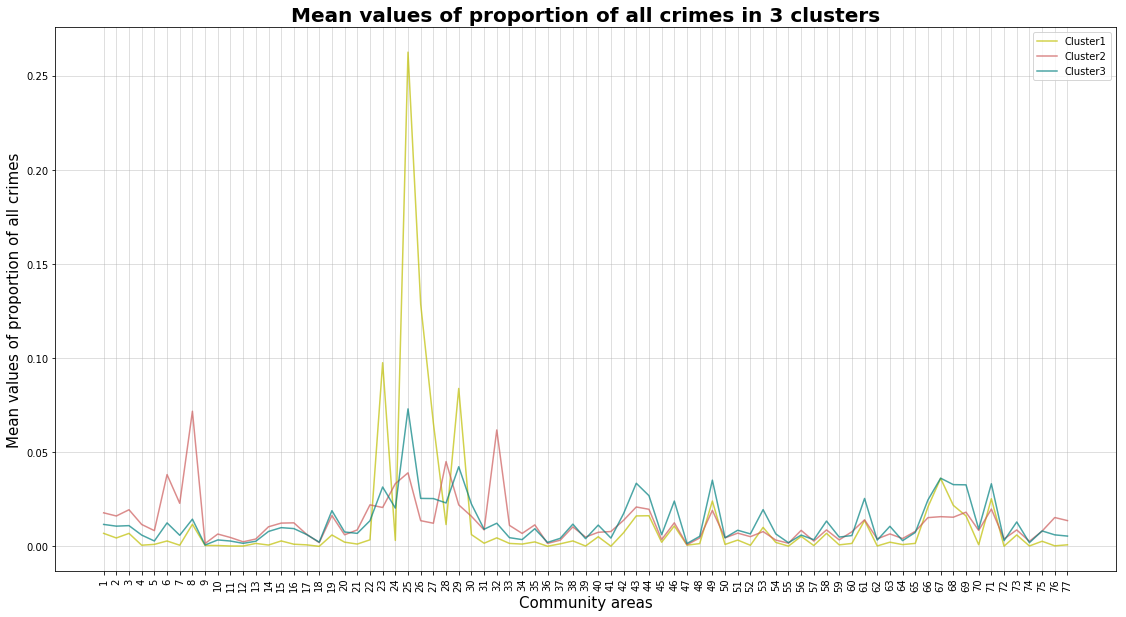

In [96]:
#create a line graph to visualize these values by cluster. 
fig = pl.figure(figsize = (19,10))
X=np.arange(77)
pl.plot(X,a,c='y',label = 'Cluster1',alpha = 0.7)
pl.plot(X,b,c='Indianred',label = 'Cluster2',alpha = 0.7)
pl.plot(X,c,c='teal',label = 'Cluster3',alpha = 0.7)
pl.legend()
pl.xticks(X,range(1,78),rotation=90)
pl.ylabel('Mean values of proportion of all crimes',fontsize = 15)
pl.xlabel('Community areas',fontsize = 15)
pl.title('Mean values of proportion of all crimes in 3 clusters', weight='bold',size = '20')
pl.grid(alpha = 0.5)
pl.show()

#### Fig3. Mean values of proportion of all crimes in 3 clusters(community areas)

* From the plot above, we can easily notice that community area(CA) 25 has significant large proportion counts in cluster1 and cluster3 compares to other community areas, other community areas with disproportionate amounts of clutser1 is CA23, CA29, and for cluster 2, CA8 and CA32 is notable. 

You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.). You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

In [29]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


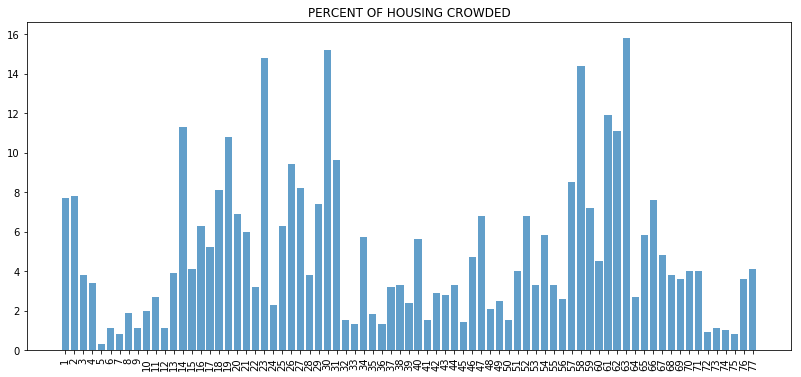

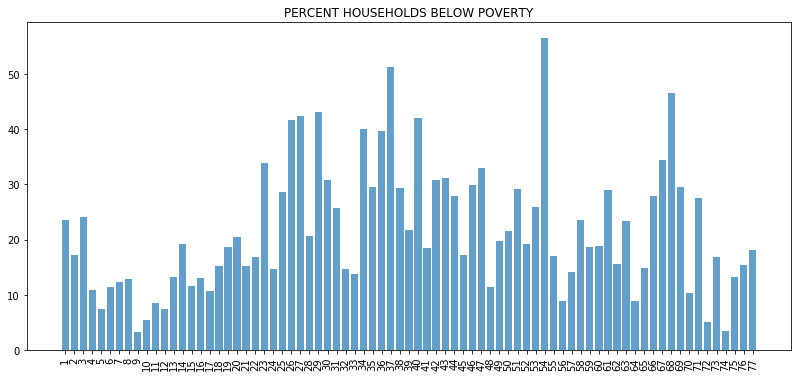

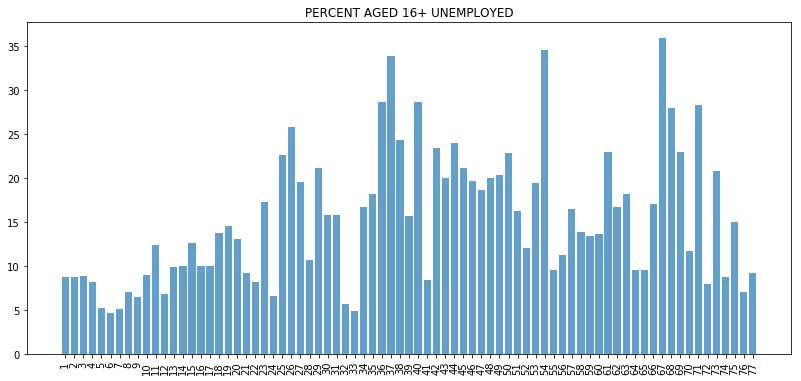

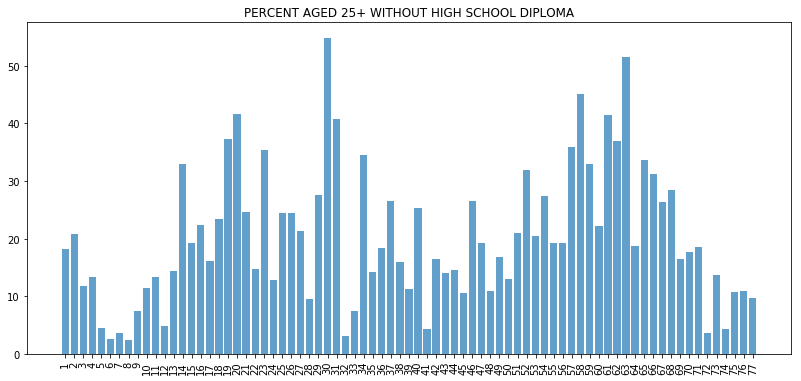

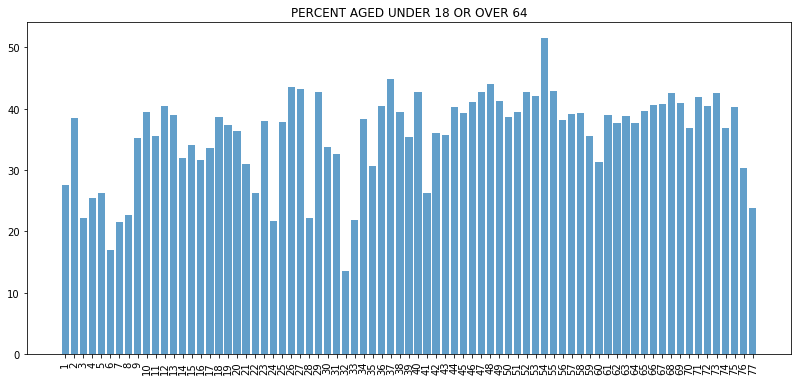

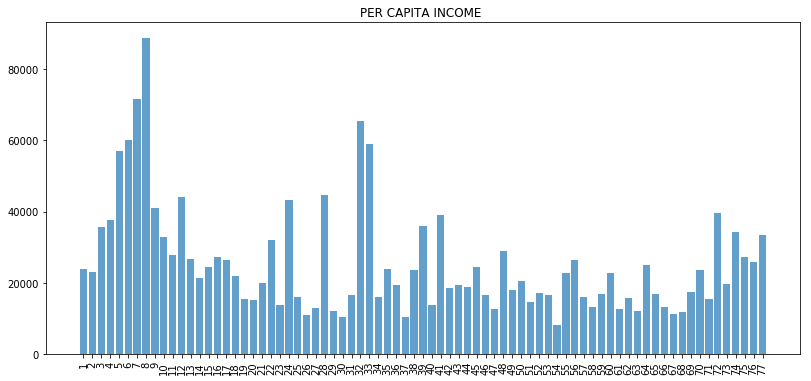

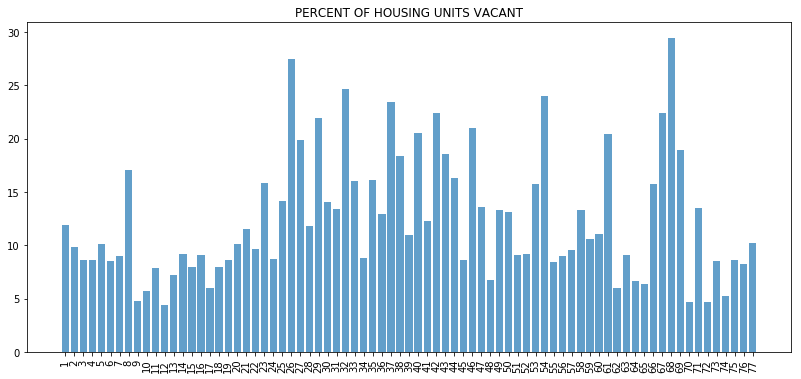

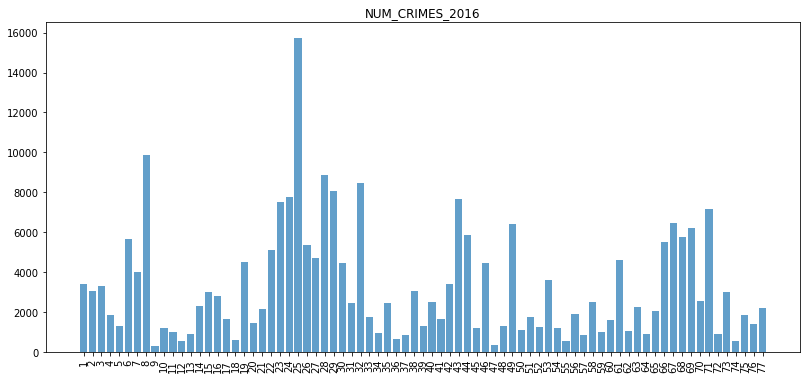

In [287]:
#visualize the characteristics
X=range(77)
for i in range(1,9):
    pl.figure(figsize = (22,20))
    pl.subplot(420+i)
    pl.bar(X,data4.iloc[:,3+i], alpha=0.7)
    pl.xticks(X,range(1,78),rotation=90)
    pl.title(data4.columns[3+i])
    pl.tight_layout()
    pl.show()

#### Fig4. community area characteristics

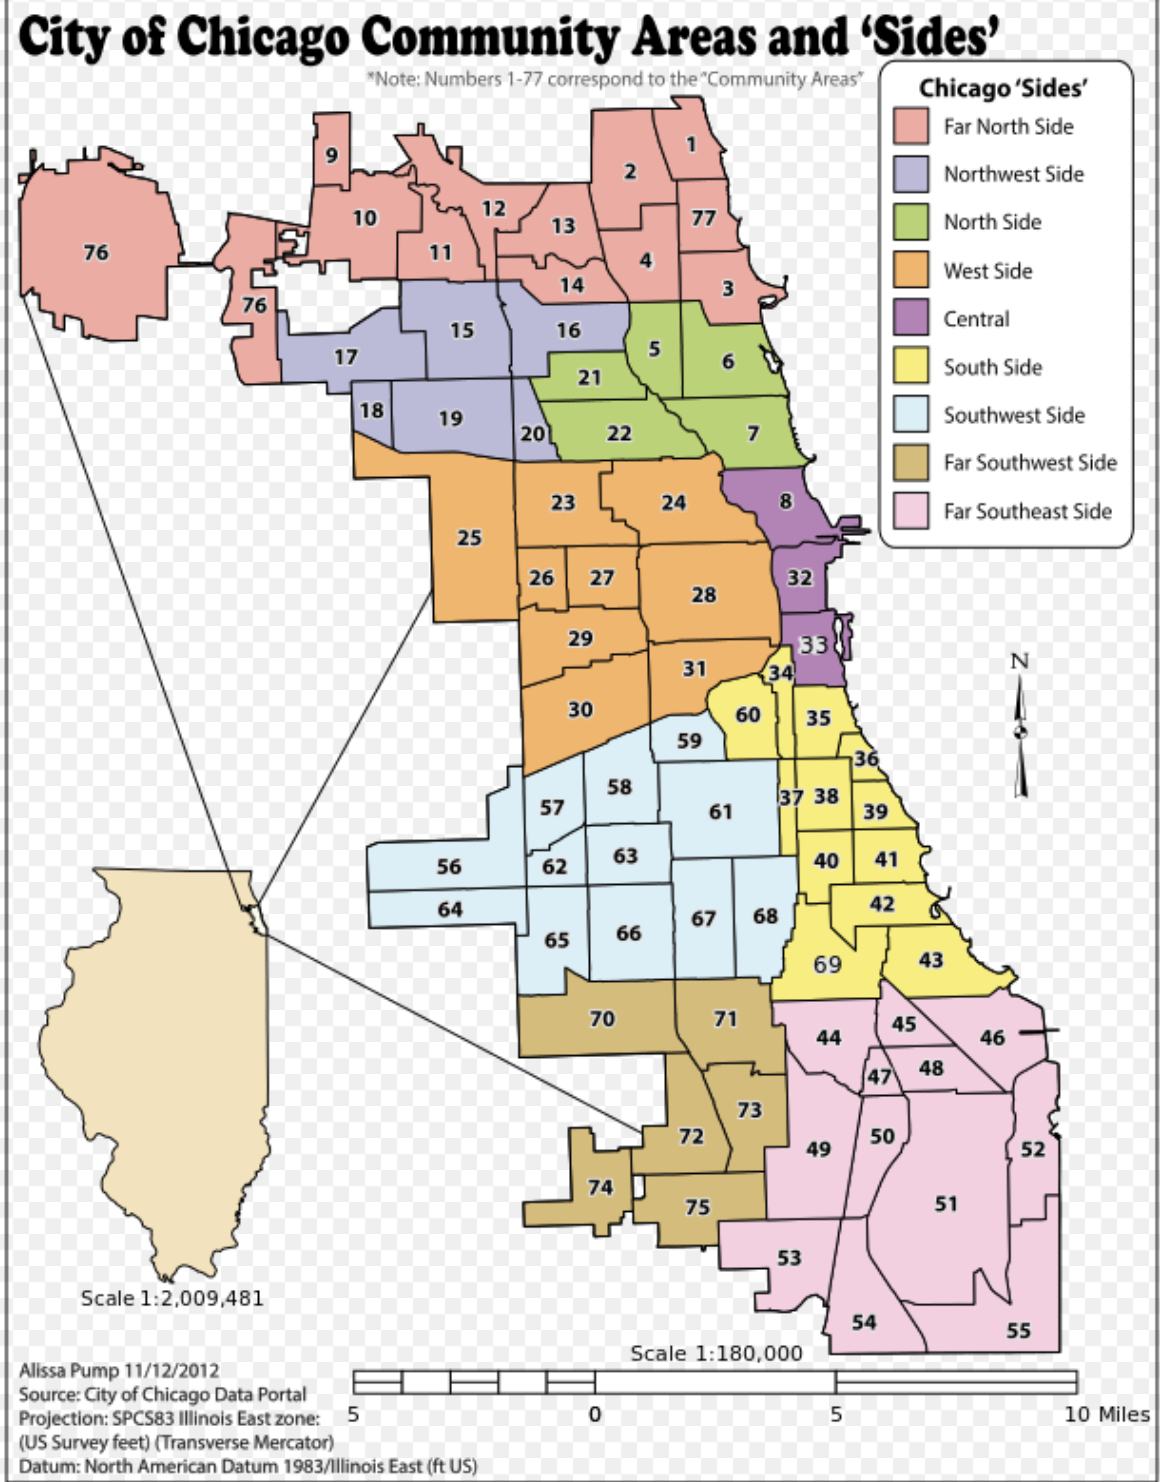

In [107]:
Image('CA.png',width= 400,height = 600)

#### Fig5. Chicago community areas 

In the Fig3, we already notice that CA25 CA23, CA29, CA8 and CA32 have higher mean values of proportion of crimes, from Fig4 and Fig5, I learn that
* CA23 has high percent of housing crowded;
* CA32 has relatively low percent of aged 25+ without high school diploma and percent of aged under 18 or over 64 and high per capita income;
* CA8 has the highest per capita income, we can refer from the map above that it is adjacent to CA32, I guess this area is more like a central business district, also, both CA8 and CA32 show high mean values of proportion of crimes in cluster 2;
* CA25 has the highest number of crime counts in 2016, we can treat CA25 has significant large proportion counts in cluster1 and cluster3 compares to other community is a reflection of this characteristic.

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)




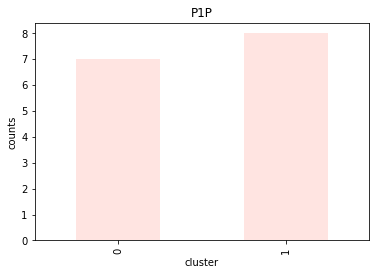

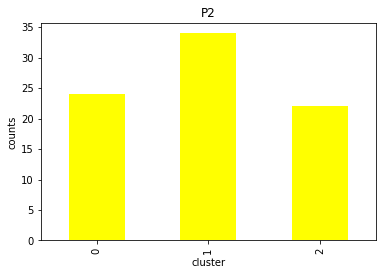

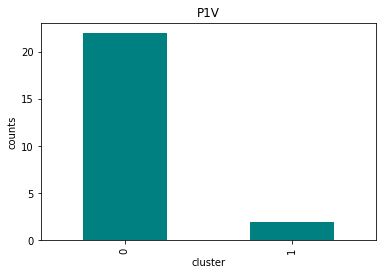

In [383]:

ax1 = df_hrs_fbi[df_hrs_fbi['Category']=='P1P'].groupby(df_hrs_fbi['cluster']).count().plot(kind="bar", color='mistyrose',title='P1P')
ax1.legend_.remove()
ax1.set_ylabel('counts')
ax2 = df_hrs_fbi[df_hrs_fbi['Category']=='P2'].groupby(df_hrs_fbi['cluster']).count().plot(kind="bar", color='yellow',title='P2')
ax2.legend_.remove()
ax2.set_ylabel('counts')
ax3 = df_hrs_fbi[df_hrs_fbi['Category']=='P1V'].groupby(df_hrs_fbi['cluster']).count().plot(kind="bar", color='teal',title='P1V')
ax3.legend_.remove()
pl.ylabel('counts')
pl.show()


#### Fig6. FBI categories counts in each cluster(hour-of-day trend)
from the figure above, we can see that the three groups formed by clustering hour-of-day trends is not correspond to the FBI’s division between P1V, P1P, and P2 crimes.

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [392]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage,fcluster

In [387]:
dfw=df_week.iloc[:,1:]
dfw.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [388]:
# K-means
range_n_clusters = range(2,10)

dd = dfw
for i in range_n_clusters:
    n = i
    km=KMeans(random_state=324,n_clusters=n)
    res2 = km.fit(dd)
    silhouette_avg = silhouette_score(dd, res2.labels_)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.234967039802
For n_clusters = 3, the average silhouette_score is : 0.232859305226
For n_clusters = 4, the average silhouette_score is : 0.210690671645
For n_clusters = 5, the average silhouette_score is : 0.153223514174
For n_clusters = 6, the average silhouette_score is : 0.170242880032
For n_clusters = 7, the average silhouette_score is : 0.173353484564
For n_clusters = 8, the average silhouette_score is : 0.184212008422
For n_clusters = 9, the average silhouette_score is : 0.137644013416


Since the silhouette score is largest when number of clusters =2, k =2 is the optimal solution of num of clusters.

In [389]:
n = 2
dd = dfw
km=KMeans(random_state=324,n_clusters=n)
res2 = km.fit(dd)
res2.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int32)

In [391]:
element_kmeans = pd.DataFrame(df['crime_type'])
element_kmeans["Label"] = res2.labels_
element_kmeans = element_kmeans.sort_values(['Label'], ascending=[True])
element_kmeans.groupby("Label").count()

,crime_type
Label,
0,56
1,63


* Gaussian Mixture Model

In [394]:
for i in range_n_clusters:
    gmm = GaussianMixture(n_components=i,random_state=100)
    res3 = gmm.fit(dd)
    labels = res3.predict(dd)
    silhouette_avg = silhouette_score(dd, labels)
    print("When n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

When n_clusters = 2, the average silhouette_score is : 0.25672726757
When n_clusters = 3, the average silhouette_score is : 0.220138318719
When n_clusters = 4, the average silhouette_score is : 0.227039527208
When n_clusters = 5, the average silhouette_score is : 0.228181354752
When n_clusters = 6, the average silhouette_score is : 0.131900647716
When n_clusters = 7, the average silhouette_score is : 0.124568298065
When n_clusters = 8, the average silhouette_score is : 0.0926766174968
When n_clusters = 9, the average silhouette_score is : 0.131345891873


Here we select k = 2 as our best solution of number of clusters.

In [395]:
n = 2
dd = dfw
gmm = GaussianMixture(n_components=n,random_state=100)
res3 = gmm.fit(dd)
labels = res3.predict(dd)
labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1])

In [396]:
element_GMM = pd.DataFrame(df['crime_type'])
element_GMM["Label"] = labels
element_GMM = element_GMM.sort_values(['Label'], ascending=[True])
element_GMM.groupby("Label").count()

,crime_type
Label,
0,89
1,30


* Bottom-up hierarchical clustering with "single link" distance metric

In [398]:
range_n_clusters = range(2,10)

Z = linkage(dfw, 'single')

for i in range_n_clusters:
    S_labels=fcluster(Z, i, criterion='maxclust')    
    silhouette_avg = silhouette_score(dfw, S_labels)
    print("When n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg))

When n_clusters = 2, the average silhouette_score is : 0.637764808067
When n_clusters = 3, the average silhouette_score is : 0.556847738297
When n_clusters = 4, the average silhouette_score is : 0.40557775076
When n_clusters = 5, the average silhouette_score is : 0.387703818875
When n_clusters = 6, the average silhouette_score is : 0.390076195102
When n_clusters = 7, the average silhouette_score is : 0.346218448204
When n_clusters = 8, the average silhouette_score is : 0.328998157644
When n_clusters = 9, the average silhouette_score is : 0.325421927489


Here we select k = 2 as our best solution of number of clusters.

In [400]:
n = 2
dd = dfw
S_labels=fcluster(Z, n, criterion='maxclust') 
S_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [401]:
element_HS = pd.DataFrame(df['crime_type'])
element_HS["Label"] = S_labels
element_HS = element_HS.sort_values(['Label'], ascending=[True])
element_HS.groupby("Label").count()

,crime_type
Label,
1,118
2,1


* Bottom-up hierarchical clustering with "complete link" distance metric.

In [402]:
Z2 = linkage(dfw, 'complete')

for i in range_n_clusters:
    C_labels=fcluster(Z2, i, criterion='maxclust')    
    silhouette_avg = silhouette_score(dfw, C_labels)
    print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}".format(silhouette_avg)) 

For n_clusters = 2, the average silhouette_score is : 0.610064611355
For n_clusters = 3, the average silhouette_score is : 0.172687181466
For n_clusters = 4, the average silhouette_score is : 0.192151693748
For n_clusters = 5, the average silhouette_score is : 0.150252078225
For n_clusters = 6, the average silhouette_score is : 0.152296815722
For n_clusters = 7, the average silhouette_score is : 0.149262676161
For n_clusters = 8, the average silhouette_score is : 0.101304401234
For n_clusters = 9, the average silhouette_score is : 0.100665038992


Here we select k = 2 as our best solution of number of clusters.

In [404]:
n = 2
dd = dfw
C_labels=fcluster(Z2, n, criterion='maxclust') 
C_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [405]:
element_CS = pd.DataFrame(df['crime_type'])
element_CS["Label"] = C_labels
element_CS = element_CS.sort_values(['Label'], ascending=[True])
element_CS.groupby("Label").count()

,crime_type
Label,
1,2
2,117


* In all those methods, we can see that the best number of clusters is 2.
* There is strong labeling homogeneity in hierarchical clustering methods(both single link and complete link). 
* K-Means clustering and GMM clustering demonstrate explicit heterogeneity. In K-means, 2 categories have similar proportion, while in GMM, the number of label 0 larger than number of label 1.